# **Part 3a:** Linear Classification

In [1]:
# Public libraries
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import linear_model
from tqdm.notebook import tqdm

# Local libraries
import tools.classification as cl

## Parameters

In [2]:
digits = ['zero','oh', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

num_words = len(digits)

dirnames = ['Results/TIDIGITS/layer_1/e-i/w0.5_tau0.5_dmax3/formants/',
            'Results/TIDIGITS/layer_1/e-i/w0.5_tau0.5_dmax3/output/',
            'Results/TIDIGITS/layer_1/tde/output/',
            'Results/TIDIGITS/layer_2/e-i/']

dir_inds = [[0],
            [0, 1],
            [0, 2],
            [0, 1, 3]
]

labels = ["Formants",
          "1 E-I layer",
          "1 TDE layer",
          "2 E-I layers"]

x_labels = ['z', 'o', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## Train and Test Classifier

In [3]:
# Result dictionaries
trainscore_dict = {}
testscore_dict = {}
weight_dict = {}
importance = {}

weight_labels = []

weight_ind = 2

# Loop over result datasets
for i, inds in enumerate(tqdm(dir_inds, desc='Result sets')):

    #weight_ind = round(random.random() * (len(digits)-1))

    # Get names of directories
    dirs = []
    for ind in inds:
        dirs.append(dirnames[ind])

    # Result arrays
    trainscores = np.array([])
    testscores = np.array([])

    # Loop over keywords
    for keyword in tqdm(digits, desc='Keywords'):

        # Get keyword index
        kw_ind = digits.index(keyword)
            
        # Create classification model
        model = linear_model.LogisticRegression(solver = 'liblinear',
                                                multi_class = 'ovr')
        
        # Train model
        score_train = cl.train(model, 'all', kw_ind, num_words, dirs, scale_data=False)
        
        # Store example weights
        if weight_ind == kw_ind:
            weight_dict[i] = model.coef_[0]
            importance[i] = cl.feature_importance(model, kw_ind, num_words, dirs, scale_data=False)
            weight_labels.append(keyword)
        
        # Test model
        score_test = cl.test(model, 'all', kw_ind, num_words, dirs, scale_data=False)
        
        # Store test score
        trainscores = np.append(trainscores, score_train)
        testscores = np.append(testscores, score_test)
        
    # Store result arrays
    trainscore_dict[i] = trainscores
    testscore_dict[i] = testscores

Result sets:   0%|          | 0/4 [00:00<?, ?it/s]

Keywords:   0%|          | 0/11 [00:00<?, ?it/s]

Keywords:   0%|          | 0/11 [00:00<?, ?it/s]

Keywords:   0%|          | 0/11 [00:00<?, ?it/s]

Keywords:   0%|          | 0/11 [00:00<?, ?it/s]

## Plots

### Accuracy Plots

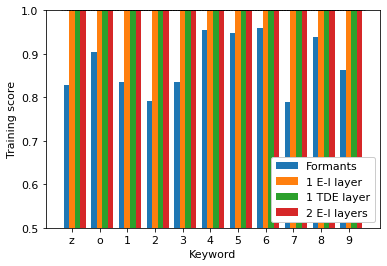

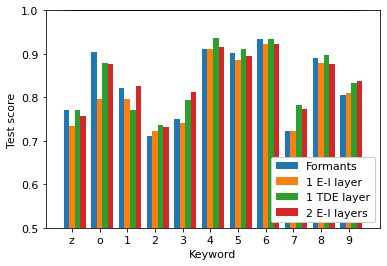

In [7]:
# Set figure font-size
plt.rcParams['font.size'] = '11'

# Set width of barplots
barwidth = 1 / (len(dirnames) + 1)

"""Train-score plot
"""
# Reset x axis
x = np.arange(len(digits))
plt.figure()

# Loop over barplots
for i in range(len(dir_inds)):
    
    # Update x axis
    x = [k + barwidth for k in x]
    
    # Create barplot
    plt.bar(x, trainscore_dict[i], width=barwidth, label=labels[i])
    #plt.plot([min(x)-barwidth, max(x)+barwidth], [1,1], 'k--', linewidth=0.5)

    # Format figure
    plt.xlabel("Keyword")
    plt.ylabel("Training score")
    plt.ylim(0.5, 1)
    plt.xticks([r + 2*barwidth for r in range(len(digits))], x_labels)
    plt.legend(loc='lower right', framealpha=1)
    
plt.savefig('Figures/scores_train.pdf')

"""Test-score plot
"""
# Reset x axis
x = np.arange(len(digits))
plt.figure()

# Loop over barplots
for i in range(len(dir_inds)):
    
    # Update x axis
    x = [k + barwidth for k in x]
    
    # Create barplot
    plt.bar(x, testscore_dict[i], width=barwidth, label=labels[i])
    #plt.plot([min(x)-barwidth, max(x)+barwidth], [1,1], 'k--', linewidth=0.5)

    # Format figure
    plt.xlabel("Keyword")
    plt.ylabel("Test score")
    plt.ylim(0.5, 1)
    plt.xticks([r + 2*barwidth for r in range(len(digits))], x_labels)
    plt.legend(loc='lower right', framealpha=1)
    
plt.savefig('Figures/scores_test.pdf')

### Coefficient Plots

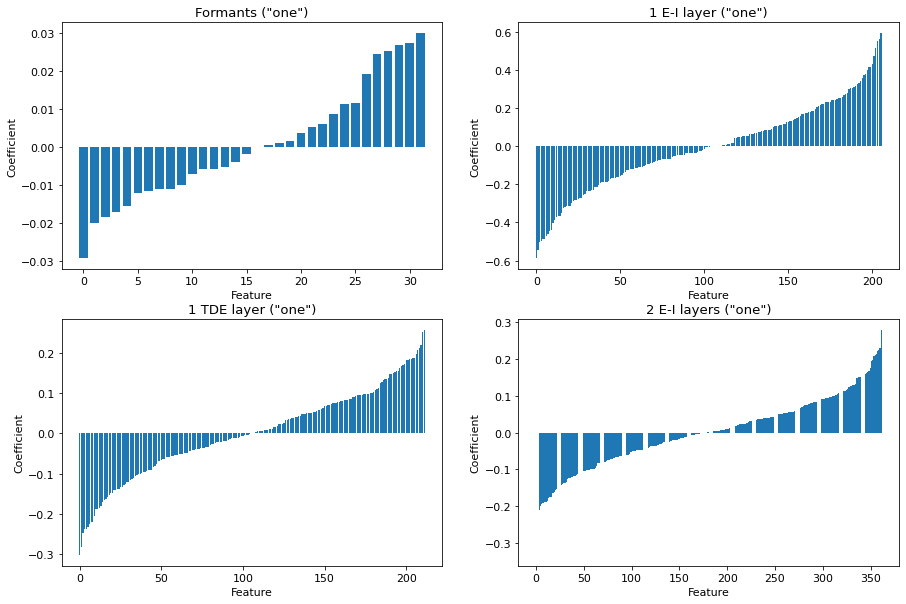

In [5]:
# Create subfigures
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs = axs.flat

x_label = "Feature"
y_label = "Coefficient"

# Loop over subfigures
for i in range(len(weight_dict)):

    weights = weight_dict[i]
    weights = np.sort(weights)
    
    x = range(len(weights))
    y = weights
    
    axs[i].bar(range(len(weights)), weights)
    
    # Format subfigure
    axs[i].set_xlabel(x_label)
    axs[i].set_ylabel(y_label)
    axs[i].set_title(labels[i] + " (\"" + weight_labels[i] + "\")")
    #axs[i].set_ylim(-19e3, 12e3)

### Feature-Importance Plots

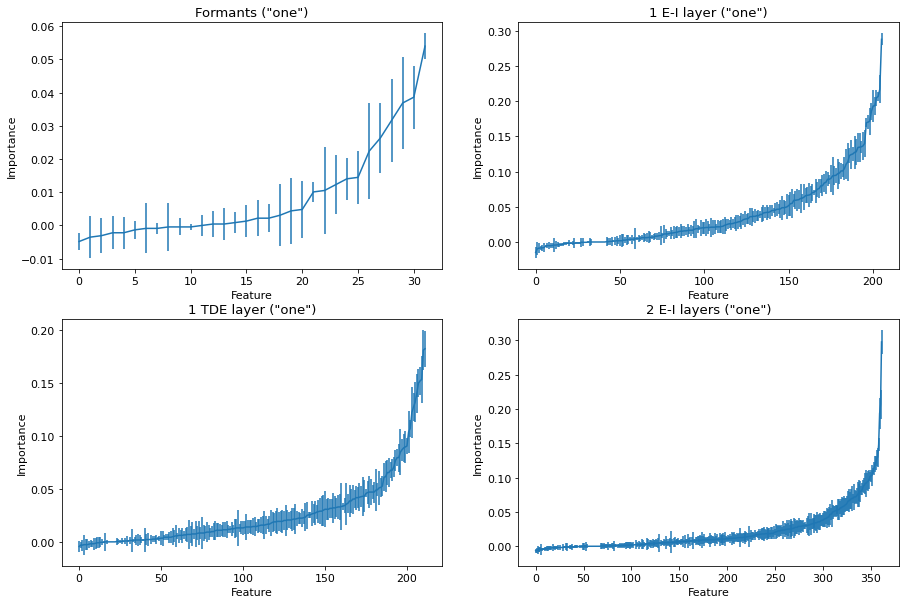

In [6]:
sort = True

# Create subfigures
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs = axs.flat

x_label = "Feature"
y_label = "Importance"

# Loop over subfigures
for i in range(len(importance)):

    mean = importance[i].importances_mean
    std = importance[i].importances_std
    x = range(len(mean))

    if sort:
        ind = np.argsort(mean)
    else:
        ind = x

    axs[i].errorbar(x, mean[ind], std[ind],
                 #linestyle = 'None',
                 #marker = '^'
    )    
    
    # Format subfigure
    axs[i].set_xlabel(x_label)
    axs[i].set_ylabel(y_label)
    axs[i].set_title(labels[i] + " (\"" + weight_labels[i] + "\")")